# Data Driven Approach:

1. Collect dataset of images + labels
2. Use ML to train a classifier
3. Test model on new images

## Nearest Neighbor:

- Training: memorizes all data and labels
- Testing: predict the label of most similar training image

How do we mathematically define similar?

## Distance Metrics:

### L1 Distance (Manhatten):

$$d(I_1 - I_2) = \displaystyle\sum_p | I_1^p - I_2^p | $$

## Problems with Data Driven Approach:

Training is $O(1)$ time whereas testing time is $O(n)$. This is not useful as we want most models to test on new situations in real time. Ideal models would have opposite times.

# Linear Classifier:

$$f(x, W) = Wx + b$$

## Loss Functions:

Given a dataset $\{ (x_i, y_i) \}_{i=1}^N$ where $x_i$ is the image and $y_i$ is an integer representing the label.

Loss is mathematically defined as the sum of loss over examples:
$$L = \frac{1}{N} \displaystyle\sum_i L_i(f(x_i, W), y_i) $$

$L_i$ can be chosen arbitrarily depending on the problem. Below are some $L_i$ functions that can be uesd

### Multiclass SVM Classifier Loss:
$$L_i = \displaystyle\sum_{j \neq y} \max(0, s_j - s_{y_i} + \Delta)$$

In [1]:
import numpy as np

def LiMulticlassSVM(x,y,W,delta): # Need to double check this.
  scores = W.dot(x)
  L_i = np.sum(np.max(0, sj - y + delta))
  L = (1 / x.shape[0]) * np.sum(L_i)
  return L

### Softmax Classifier Loss:

$$L_i = -\log \left( \frac{e^{f_{y_i}}}{\sum_j e^{f_j}} \right) $$

From a probabalistic viewpoint:

$$ P(y_i | x_i, W) = \frac{e^{f_{y_i}}}{\sum_j e^{f_j}} $$

In [2]:
def p(x,y,W):
  f = W.dot(x)
  f -= np.max(f)
  p = np.exp(f) / np.sum(np.exp(f))
  return p

def LiSoftmax(p):
  return -np.log(p)

## Optimization

The **gradient** is the vector of partial derivatives along each dimension. The slope in any direction is the **dot product** of the direction with the gradient. The direction of steepest descent is the negative gradient.

- Numerical Gradient: approximate, slow, and easy to write.
- Analytic gradient: exact, fast, error-prone

We always use analytic gradient but we can check our implementation with the numerical gradient. This is called a gradient check. It makes a great debugging tool.

In [3]:
#Psuedocode for vanilla gradient descent

'''
while True:
  weights_gradient = evaluate_gradient(loss_fun, data, weights)
  weights += - step_size * weights_grad 
''';

### Stochastic Gradient Descent (SGD)

$$\Delta_W L(W) = \frac{1}{N} \displaystyle\sum_{i=1}^N \Delta_W L_i(x_i, y_i, W) + \lambda \Delta_W R(W) $$

where $N$ is a **minibatch** of examples (usally a power of 2) from the dataset. We evaluate the gradient of the weights in each batch and update the weights from there.

In [4]:
#Psuedocode for vanilla minibatch gradient descent

'''
while True:
  minibatch = sample_traning_data(data, 256)
  weights_gradient = evaluate_gradient(loss_function, minibatch, weights)
  weights += - step_size * weights_grad 
''';

# Activation Functions

## Sigmoid:

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

- Converts numbers to range of [0,1]
- Has nice interpretation as a saturating "firing rate" of a neuron

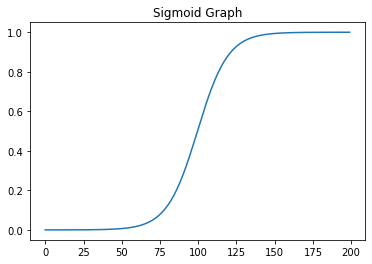

In [5]:
import matplotlib.pyplot as plt
import math

def sigmoid(x):
  return (1 / (1 + math.exp(-x)))

graph = [sigmoid(x) for x in np.linspace(-10,10, 200)]

plt.title("Sigmoid Graph")
plt.plot(graph)

### Problems with Sigmoid:

- Saturated neurons "kill" the gradients (in the very negative regions, the gradient becomes 0. When x is around 0, the gradient is okay. However, when the x is in a very positive region the gradient is 0.)

- Not zero centered (as viewed above.)

- exp() is computationally expensive.

## tanh(x)

- Range of x becomes [-1,1]
- Makes it zero centered
- Still kills gradients when saturated.

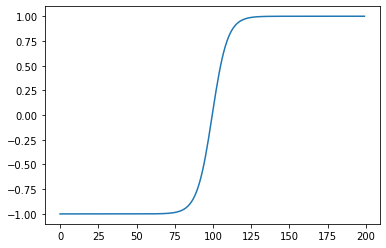

In [6]:
tanh = [np.tanh(x) for x in np.linspace(-10,10, 200)]
plt.plot(tanh)

## ReLU (Rectified Linear Unit)

$$ f(x) = \max(0,x) $$

- Does not saturate in positive region
- Very computationally efficient
- Converges much faster than sigmoid or tanh
- Biologically more plausible than sigmoid

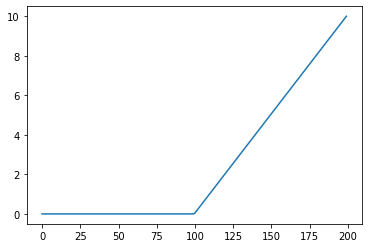

In [7]:
def ReLU(x):
  return max(0,x)
relu = [ReLU(x) for x in np.linspace(-10,10, 200)]
plt.plot(relu)

### Problems with ReLU:
- Not zero centered

## Leaky ReLU
$$ f(x) = \max(0.01x, x) $$
- Does not saturate
- Computationally efficient
- Converges much faster than sigmoid and tanh
- Does not "die"

### Parametric Rectifier:
$$ f(x) = \max(\alpha x, x) $$
where we use backprop into $\alpha.$

The higher $\alpha$ is, the larger the graph angles away from zero.

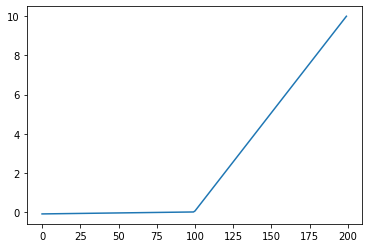

In [8]:
leaky = [max(0.01*x, x) for x in np.linspace(-10,10, 200)]
plt.plot(leaky)

In practice, we generally use ReLU. We can try out Leaky ReLU or other activation functions for experimentation.